##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Prompting Quickstart with REST

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb"><img src="../../images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


If you want to quickly try out the Gemini API, you can use `curl` commands to call the methods in the REST API.

This notebook contains `curl` commands you can run in Google Colab, or copy to your terminal.

To run this notebook, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you are running in a different environment, you can store your key in an environment variable. See [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) to learn more.

In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

## Run your first prompt

Use the `generateContent` method to generate responses to your prompts. You can pass text directly to `generateContent`.


In [ ]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{"text": "Give me python code to sort a list."}]
        }]
       }' 2> /dev/null

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "```python\n# Example list to be sorted\nmy_list = [5, 3, 1, 2, 4]\n\n# Sort the list in ascending order using the sort() method\nmy_list.sort()\n\n# Print the sorted list\nprint(my_list)\n```\n\nOutput:\n\n```\n[1, 2, 3, 4, 5]\n```"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",
      "index": 0,
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HATE_SPEECH",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HARASSMENT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
          "probability": "NEGLIGIBLE"
        }
      ]
    }
  ],
  "usageMetadata": {
    "promptTokenCount": 9,
    "candidatesTokenCoun

### Use images in your prompt

Here you will download an image from a URL and pass that image in the prompt.

In [ ]:
%%bash

curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  1548k      0 --:--:-- --:--:-- --:--:-- 1551k


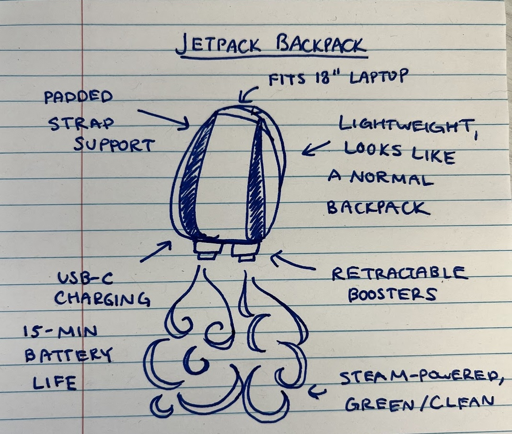

In [ ]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img.resize((512, int(img.height*512/img.width)))

Now you will base64 encode the image, and include it in the prompt.

There are slight output differences of different base64 encoding tools, so you will need to pick the right one.

The following will work in Google Colab.

In [ ]:
%%bash

echo '{
  "contents":[
    {
      "parts":[
        {"text": "This image contains a sketch of a potential product along with some notes. \
        Given the product sketch, describe the product as thoroughly as possible based on what you \
        see in the image, making sure to note all of the product features. Return output in json format: \
        {description: description, features: [feature1, feature2, feature3, etc]}"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

Then you can include the image in the prompt by just passing in the `request.json` created to `generateContent`.

In [ ]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d @request.json

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "```json\n{\n \"description\": \"The Jetpack Backpack is a backpack that allows the user to fly. It looks and functions like a normal backpack, but has retractable boosters that are powered by steam. The backpack has a 15-minute battery life and is charged via USB-C.  The backpack is also lightweight and has padded strap support.\",\n \"features\": [\n  \"retractable boosters\",\n  \"steam-powered\",\n  \"green/clean\",\n  \"15-min battery life\",\n  \"USB-C charging\",\n  \"padded strap support\",\n  \"lightweight\",\n  \"looks like a normal backpack\",\n  \"fits 18\\\" laptop\"\n ]\n}\n```"
          }
        ],
        "role": "model"
      },
      "finishReason": "STOP",
      "index": 0,
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_HATE_SPEECH"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  467k    0  1410  100  466k    727   240k  0:00:01  0:00:01 --:--:--  240k


If you are running on a Mac, copy and paste this command into your terminal instead.

```
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key=${GOOGLE_API_KEY}" \
        -H 'Content-Type: application/json' \
        -d '{
  "contents":[
    {
      "parts":[
        {"text": "foo"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -i image.jpg)'"
          }
        }
      ]
    }
  ]
}'   2> /dev/null  | grep -C 5 "text"
```

Here image is being `base64` encoded, then savie the curl request with the image data in a JSON file. Run this cell to see which version of `base64` you have. Based on the output, you may need to run this request on either a Mac or on Colab.

In [ ]:
%%bash

base64 --version | head -n 1

base64 (GNU coreutils) 8.32


If you get `FreeBSD base64 ...`, (Mac) use `base64 -i`.

If you get `base64 (GNU coreutils)...` (Colab) use `base64 -w0`.

### Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [ ]:
%%bash
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [
        {"role":"user",
         "parts":[{
           "text": "In one sentence, explain how a computer works to a young child."}]},
        {"role": "model",
         "parts":[{
           "text": "A computer is like a smart helper that can store information, do math problems, and follow our instructions to make things happen."}]},
        {"role": "user",
         "parts":[{
           "text": "Okay, how about a more detailed explanation to a high schooler?"}]},
      ]
    }' 2> /dev/null | grep -C 5 "text"

  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the programs that run on the computer. The hardware includes the central processing unit (CPU), which is the \"brain\" of the computer and controls all of its operations, as well as memory, storage devices, input devices (such as keyboards and mice), and output devices (such as monitors and printers). The software includes the operating system, which manages the computer's resources and provides a platform for running applications, as well as application software, which performs specific tasks for the user, such as word processing, spreadsheets, and games. When a user gives a command to the computer, the CPU fetches the appropriate instructions from memory and executes them. The results of the instruct

**Note**: Make sure to use `gemini-pro` and text-only input for chat use cases.

### Configuration

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. Learn more about [model parameters](https://ai.google.dev/docs/concepts#model_parameters).

For instance, `temperature` controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

The following example specifies values for all the parameters of the `generateContent` method.

In [ ]:
%%bash

curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY" \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "contents": [{
            "parts":[
                {"text": "Give me a numbered list of cat facts."}
            ]
        }],
        "safetySettings": [
            {
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
                "threshold": "BLOCK_ONLY_HIGH"
            }
        ],
        "generationConfig": {
            "stopSequences": [
                "Title"
            ],
            "temperature": 0.9,
            "maxOutputTokens": 2000,
        }
    }'  2> /dev/null | grep "text"

            "text": "1. Cats have 32 muscles in their ears, allowing them to rotate them 180 degrees.\n2. The average lifespan of a domestic cat is 12-15 years.\n3. Cats have five toes on their front paws and four on their back paws.\n4. A group of cats is called a clowder or a glaring.\n5. Cats have a keen sense of smell, with approximately 200 million scent receptors in their noses.\n6. Cats are obligate carnivores, meaning they must eat meat to survive.\n7. The domestication of cats began around 9,000 years ago in the Middle East.\n8. Cats have a unique organ called the Jacobson's organ, which helps them detect scents and pheromones.\n9. Cats can purr at a frequency of 25-150 hertz, which is believed to have therapeutic effects.\n10. The world's smallest cat breed is the Singapura, which weighs around 4-8 pounds."


## Next steps

The Gemini API has configurable safety settings. Learn more [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/rest/Safety_REST.ipynb).